# Logistic Regression

### Importing Libraries

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 non-null    i

### Segregating variables: Independent and Dependent Variables

In [6]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Splitting the data into train set and the test set

In [7]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Normalising using *min_max_scaler*

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [10]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Implementing Logistic Regression

In [12]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [13]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions using *predict* function

In [17]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [18]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7514910536779325


In [20]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.736842105263158


### Making predictions using *predict_proba* function

In [21]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.5182471 , 0.4817529 ],
       [0.90627102, 0.09372898],
       [0.8727036 , 0.1272964 ],
       ...,
       [0.22589517, 0.77410483],
       [0.313059  , 0.686941  ],
       [0.0439685 , 0.9560315 ]])

In [22]:
train_preds = train_predict[:,1]
train_preds

array([0.4817529 , 0.09372898, 0.1272964 , 0.77746626, 0.63062753,
       0.11697168, 0.84488713, 0.7742802 , 0.53426212, 0.08370701,
       0.10636956, 0.08568815, 0.12452342, 0.09661283, 0.60901108,
       0.08470698, 0.30812603, 0.12064655, 0.07183424, 0.28656605,
       0.10270537, 0.2189199 , 0.0713914 , 0.58962037, 0.09055991,
       0.5141696 , 0.08554325, 0.55778649, 0.60360411, 0.12875163,
       0.82076757, 0.08572279, 0.58581927, 0.13669435, 0.02233846,
       0.57563152, 0.21865126, 0.12606494, 0.05880173, 0.28564007,
       0.84156228, 0.39210271, 0.20332494, 0.7069101 , 0.4809796 ,
       0.94312775, 0.3707232 , 0.22114072, 0.1680826 , 0.89258139,
       0.13299139, 0.63982433, 0.23915634, 0.61051037, 0.34150758,
       0.64643627, 0.77922622, 0.29297774, 0.10959416, 0.29880822,
       0.58462162, 0.29297774, 0.12488663, 0.45824032, 0.10299941,
       0.97631192, 0.11737812, 0.08568815, 0.864225  , 0.66370498,
       0.93087019, 0.74888141, 0.89843144, 0.4497857 , 0.84191

In [23]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0
  

In [24]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7366255144032922


# Confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[127  17]
 [ 23  56]]


In [26]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       144
           1       0.77      0.71      0.74        79

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



# Parameters of Logistic Regression

In [27]:
# printing the coefficients
logreg.coef_

array([[-0.03568891,  0.00286621,  1.01912888,  0.15077432, -1.08200336,
         1.18997467, -1.10207483,  0.84974756,  1.06264319,  0.35165662,
        -0.676523  , -0.78737301, -0.28571324, -0.42653828,  0.1253816 ,
         0.59977013, -0.18644255,  0.21151672, -0.35300262, -0.14157084,
        -0.1677526 ,  0.14310142,  0.23485583, -0.29005741]])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

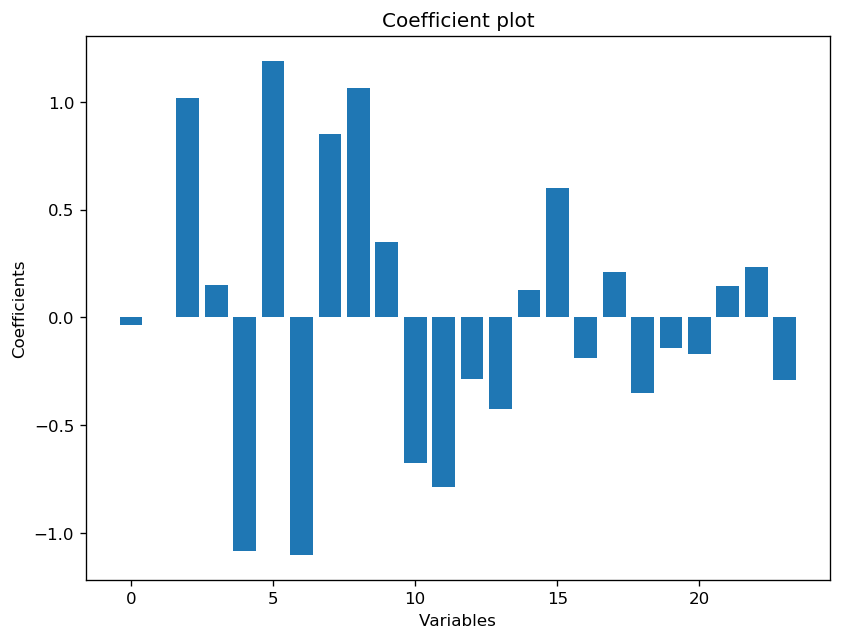

In [28]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [29]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,0.035689
1,Fare,0.002866
2,Pclass_1,1.019129
3,Pclass_2,0.150774
4,Pclass_3,1.082003


In [31]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [32]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0


In [33]:
# Using train test split function
train_x,test_x,train_y,test_y = train_test_split(subset, y, random_state = 56)

### Implementing Logistic Regression

In [34]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions using *predict* function

In [35]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7011952191235059


Text(0.5, 1.0, 'Coefficient plot')

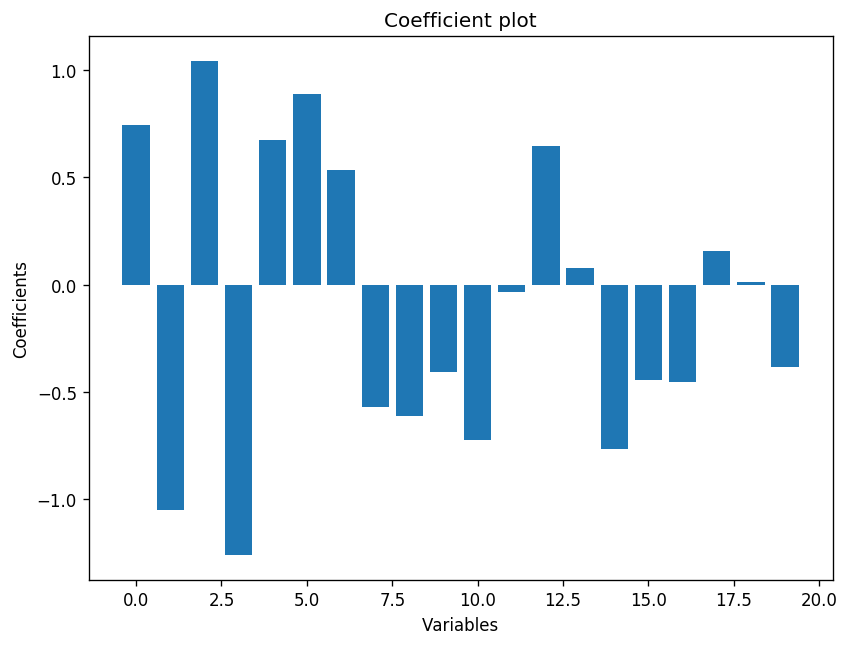

In [113]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')